In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import pymc3 as pm
import theano.tensor as tt

import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

2. Comparison of two multinomial observations: on September 25, 1988, the evening of a
presidential campaign debate, ABC News conducted a survey of registered voters in the
United States; 639 persons were polled before the debate, and 639 different persons were
polled after. The results are displayed in Table 3.2. Assume the surveys are independent
simple random samples from the population of registered voters. Model the data with
two different multinomial distributions. For j = 1, 2, let αj be the proportion of voters
who preferred Bush, out of those who had a preference for either Bush or Dukakis at
the time of survey j. Plot a histogram of the posterior density for α2 − α1 . What is the
posterior probability that there was a shift toward Bush?


In [2]:
data = pd.DataFrame(dict(
    bush=[294, 288],
    dukakis=[307, 332],
    noop=[38, 19],
    n=[639, 639],
))

data

,bush,dukakis,noop,n
0,294,307,38,639
1,288,332,19,639


In [6]:
with pm.Model() as m1:
    pref = pm.Dirichlet('pref', a=np.ones(3)/3., shape=(2, 3),
                        testval=np.ones(3)/3.)
    
    votes = pm.Multinomial('votes', n=data.n.values.reshape(2, 1), p=pref,
                           observed=data[['bush', 'dukakis', 'noop']].values)
    
    bush_shift = pm.Deterministic('bush_shift', pref[1, 0] - pref[0, 0])
    
    m1.trace = pm.sample(10000, tune=2000, chains=2)


/home/petrushev/etc/jupenv/lib/python3.9/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [pref]


Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 10 seconds.


In [7]:
pm.summary(m1.trace, var_names=['pref', 'bush_shift'])

/home/petrushev/etc/jupenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
"pref[0,0]",0.460,0.020,0.424,0.498,0.0,0.0,29499.0,29388.0,29481.0,15792.0,1.0
"pref[0,1]",0.480,0.020,0.443,0.518,0.0,0.0,29582.0,29527.0,29606.0,16676.0,1.0
"pref[0,2]",0.060,0.009,0.043,0.078,0.0,0.0,18814.0,18814.0,18680.0,14732.0,1.0
"pref[1,0]",0.450,0.020,0.415,0.488,0.0,0.0,27871.0,27844.0,27802.0,14038.0,1.0
"pref[1,1]",0.519,0.020,0.483,0.556,0.0,0.0,28057.0,27965.0,28005.0,15006.0,1.0
"pref[1,2]",0.030,0.007,0.018,0.043,0.0,0.0,13858.0,13858.0,13401.0,12371.0,1.0
bush_shift,-0.009,0.028,-0.062,0.042,0.0,0.0,29090.0,12219.0,29075.0,15866.0,1.0


/home/petrushev/etc/jupenv/lib/python3.9/site-packages/arviz/utils.py:660: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  warnings.warn(


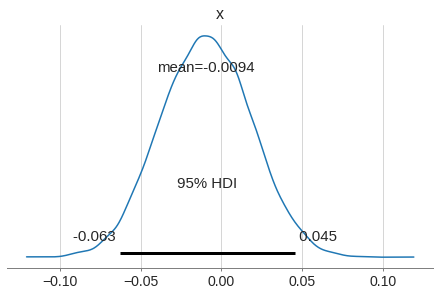

In [8]:
pm.plot_posterior(m1.trace['bush_shift'], credible_interval=.95)
None

**4.** Inference for a 2 × 2 table: an experiment was performed to estimate the effect of beta-blockers on mortality of cardiac patients. A group of patients were randomly assigned to treatment and control groups: out of 674 patients receiving the control, 39 died, and out of 680 receiving the treatment, 22 died. Assume that the outcomes are independent and binomially distributed, with probabilities of death of p0 and p1 under the control and treatment, respectively. We return to this example in Section 5.6.

(a) Set up a noninformative prior distribution on (p0 , p1 ) and obtain posterior simulations.

(b) Summarize the posterior distribution for the odds ratio, (p1 /(1 − p1 ))/(p0 /(1 − p0 )).

(c) Discuss the sensitivity of your inference to your choice of noninformative prior density.


In [9]:
data = pd.DataFrame({
    'index': ['control', 'test'],
    'n': [674, 680],
    'd': [39, 22]
})

data

,index,n,d
0,control,674,39
1,test,680,22


In [10]:
with pm.Model() as m4:
    p = pm.Beta('p', 1, 1, shape=2)

    pm.Binomial('obs', p=p, n=data.n.values, observed=data.d.values)
    
    odds = pm.Deterministic('odds', p/(1-p))
    oddr = pm.Deterministic('oddr', odds[1] / odds[0])
    
    m4.trace = pm.sample(3000, tune=2000, chains=2)

/home/petrushev/etc/jupenv/lib/python3.9/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p]


Sampling 2 chains for 2_000 tune and 3_000 draw iterations (4_000 + 6_000 draws total) took 2 seconds.


/home/petrushev/etc/jupenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


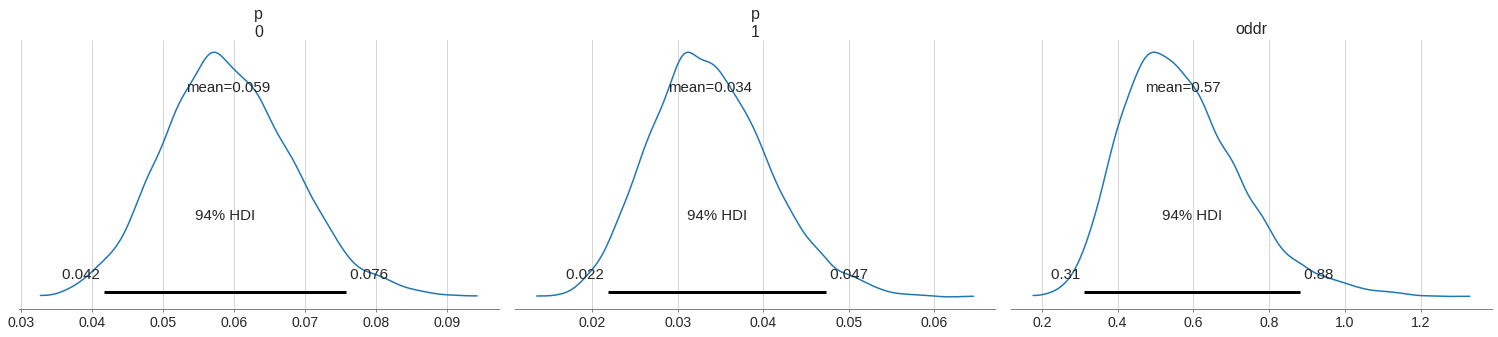

In [14]:
pm.plot_posterior(m4.trace, var_names=['p', 'oddr'], round_to=2)
None